In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

C:\Users\acer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [14]:
ec= pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\final dataset.csv")

In [15]:
country_data= ec[ec['Country']== ' India ']

In [16]:
ec.columns

Index(['CountryID', 'Country', 'Year', 'GDP', 'Population', 'Per_Capita_GNI',
       'decade_growth', 'GDP_Growth_Percentage'],
      dtype='object')

In [27]:
df = country_data[['Year','GDP','Population','Per_Capita_GNI','decade_growth','GDP_Growth_Percentage']].rename(columns ={'Year': 'ds','GDP':'y'})

In [ ]:
df['ds']= pd.to_datetime(ec['ds'],format = '%Y')

In [38]:
model = Prophet(yearly_seasonality=True)

In [39]:
model.add_regressor('Population')
model.add_regressor('Per_Capita_GNI')
model.add_regressor('decade_growth')
model.add_regressor('_GDP_Growth_Percentage')

In [40]:
model.fit(df)

ValueError: Regressor '_GDP_Growth_Percentage' missing from dataframe

In [22]:
future = model.make_future_dataframe(periods=5,freq='YE')

In [23]:
forecast = model.predict(future)

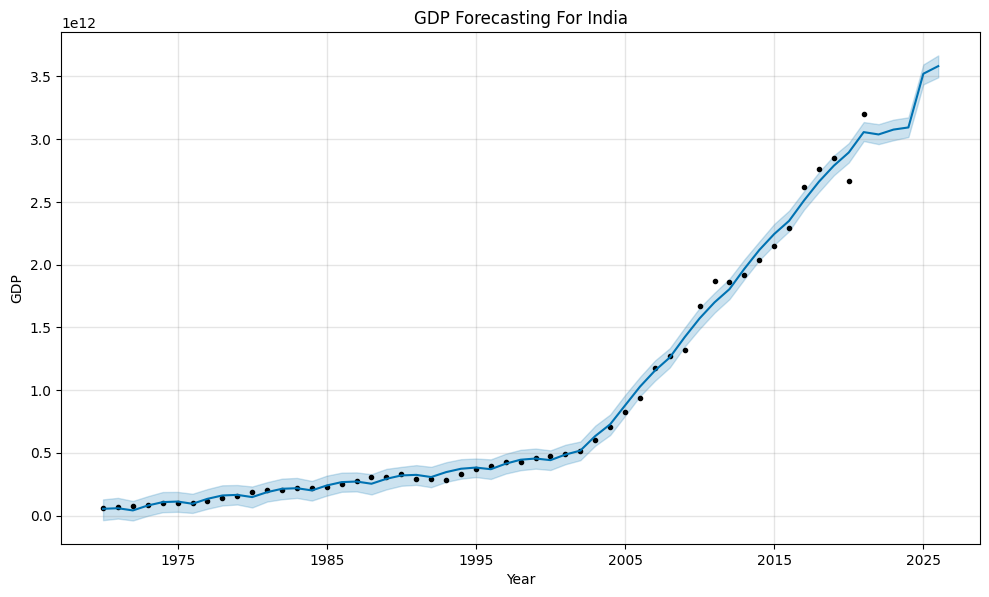

In [25]:
model.plot(forecast)
plt.title('GDP Forecasting For India')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

In [26]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
52,2021-12-31,3.037530e+12,2.960272e+12,3.119297e+12
53,2022-12-31,3.076345e+12,2.991256e+12,3.155524e+12
54,2023-12-31,3.093292e+12,3.016668e+12,3.173863e+12
55,2024-12-31,3.521313e+12,3.436807e+12,3.595391e+12
56,2025-12-31,3.582146e+12,3.492610e+12,3.667431e+12
